In [ ]:
#Observations

#1. The majority of mice were male, but only by 0.2%.

#2. The tumor volumes were considerably lower for the Capomulin and Ramicane drug regimens. Though Infubinol had an outlier of
# a lower tumor volume than expected, however, this could be for a number of reasons, such as natural immunity or simply
# human error in noting the information.

#3. There is a positive correlation between average tumor volume and mice weight. As can be seen from the last graph and the
# positive line equation, the larger the mouse in weight, the larger the average tumor volume.

In [20]:
# import dependencies 

import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

%matplotlib inline


In [21]:
# path to data files

mouse_metadata_path = "resources/mouse_metadata.csv"
study_results_path = "resources/study_results.csv"

In [22]:
# use pd to read csv files

mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [23]:
# merge data

merged_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="left")
merged_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [24]:
# Checking the number of mice.

mouse_count = merged_data["Mouse ID"].nunique()
mouse_count

249

In [25]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate = merged_data[merged_data.duplicated(['Mouse ID', 'Timepoint'])]
duplicate

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [26]:
#  Create a clean DataFrame by dropping the duplicate mouse by its ID

clean_df = merged_data.drop_duplicates(subset="Mouse ID", keep="last")
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
1859,z314,Stelasyn,Female,21,28,5,45.934712,0
1862,z435,Propriva,Female,12,26,10,48.710661,0
1872,z581,Infubinol,Female,24,25,45,62.754451,3
1882,z795,Naftisol,Female,13,29,45,65.741070,3


In [27]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM 
# of the tumor volume for each regimen

mean_tumor = clean_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
median_tumor = clean_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
variance_tumor = clean_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
stdev_tumor = clean_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
sem_tumor = clean_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

summary_stats = pd.DataFrame({"Mean of Tumour Volume": mean_tumor,
                             "Median of Tumour Volume": median_tumor,
                             "Variance of Tumour Volume": variance_tumor,
                             "Std Dev of Tumour Volume": stdev_tumor,
                             "SEM of Tumour Volume": sem_tumor
                             })

summary_stats

,Mean of Tumour Volume,Median of Tumour Volume,Variance of Tumour Volume,Std Dev of Tumour Volume,SEM of Tumour Volume
Drug Regimen,,,,,
Capomulin,36.667568,38.125164,32.663378,5.715188,1.143038
Ceftamin,57.753977,59.851956,69.982735,8.365568,1.673114
Infubinol,58.178246,60.165180,74.010875,8.602957,1.720591
Ketapril,62.806191,64.487812,98.921330,9.945920,1.989184
Naftisol,61.205757,63.283288,106.029927,10.297083,2.059417
Placebo,60.508414,62.030594,78.759797,8.874672,1.774934
Propriva,56.736964,55.841410,69.349002,8.327605,1.665521
Ramicane,36.191390,36.561652,32.166354,5.671539,1.134308
Stelasyn,61.001707,62.192350,90.331586,9.504293,1.940056


In [28]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas


bar_plot = clean_df[["Drug Regimen", "Timepoint"]]
bar_plot1 = bar_plot.set_index("Drug Regimen")
bar_plot2 = bar_plot1.groupby("Drug Regimen")
bar_plot2.sum()

,Timepoint
Drug Regimen,
Capomulin,1025
Ceftamin,765
Infubinol,765
Ketapril,815
Naftisol,805
Placebo,780
Propriva,655
Ramicane,1015
Stelasyn,785


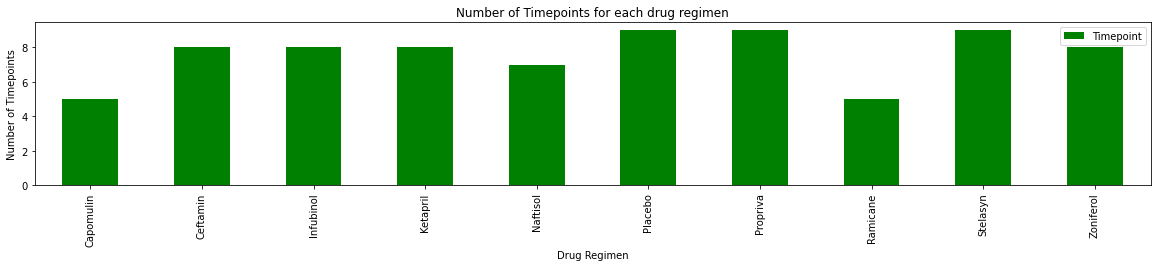

<Figure size 432x288 with 0 Axes>

In [29]:
bar_plot2.nunique().plot(kind="bar", figsize=(20,3), color="green")


plt.ylabel("Number of Timepoints")
plt.title("Number of Timepoints for each drug regimen")

plt.show()
plt.tight_layout()

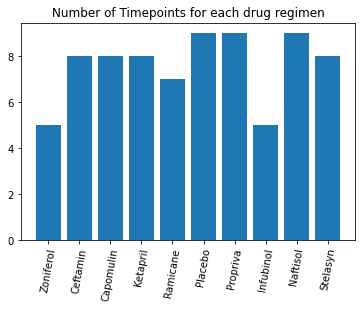

In [30]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

py_plot = clean_df[["Drug Regimen", "Timepoint"]]
py_plot1 = py_plot.groupby("Drug Regimen")

x_axis = py_plot["Drug Regimen"].value_counts().index
y_axis = py_plot1["Timepoint"].nunique()



plt.title("Number of Timepoints for each drug regimen")
plt.bar(x_axis, y_axis)

plt.xticks(rotation=80)


plt.show()


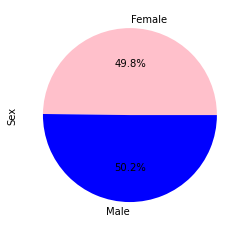

In [31]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

pie_plot = clean_df.groupby(["Sex"])["Sex"].count()
pie_plot

pie_plot.plot(kind="pie", y="sex", autopct="%1.1f%%", colors = ["pink", "blue"])

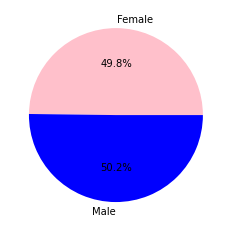

In [32]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(pie_plot, labels= ("Female", "Male"), autopct="%1.1f%%", colors=["pink", "blue"])
plt.show()



In [33]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

last_timepoint = clean_df.groupby(["Mouse ID"])["Timepoint"].max()
timepoint_df = pd.DataFrame(last_timepoint)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

new_merge_df = pd.merge(clean_df, timepoint_df, on= ("Mouse ID", "Timepoint"), how="right")
new_merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28,5,45.934712,0
245,z435,Propriva,Female,12,26,10,48.710661,0
246,z581,Infubinol,Female,24,25,45,62.754451,3
247,z795,Naftisol,Female,13,29,45,65.741070,3


In [34]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", 
             "Ramicane",
             "Infubinol",
             "Ceftamin"
             ]


# Create empty list to fill with tumor vol data (for plotting)

cap_list = []
ram_list = []
infu_list = []
ceft_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    # Locate the rows which contain mice on each drug and get the tumor volumes
    
for index, row in new_merge_df.iterrows():
    if row["Drug Regimen"] == treatments[0]:
        cap_list.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == treatments[1]:
        ram_list.append(row["Tumor Volume (mm3)"])
    if row["Drug Regimen"] == treatments[2]:
        infu_list.append(row["Tumor Volume (mm3)"])
    if row["Drug Regimen"] == treatments[3]:
        ceft_list.append(row["Tumor Volume (mm3)"])
        
tumor_vol_df = pd.DataFrame({treatments[0]: cap_list,
                            treatments[1]: ram_list,
                            treatments[2]: infu_list,
                            treatments[3]: ceft_list
                            })

tumor_vol_df
    

    


,Capomulin,Ramicane,Infubinol,Ceftamin
0,23.343598,22.050126,67.973419,62.999356
1,28.484033,29.128472,65.525743,45.000000
2,28.430964,30.276232,57.031862,56.057749
3,30.485985,30.564625,66.083066,55.742829
4,31.023923,30.638696,72.226731,48.722078
5,31.896238,31.560470,36.321346,47.784682
6,32.377357,31.095335,60.969711,61.849023
7,33.329098,33.397653,62.435404,68.923185
8,34.455298,32.978522,60.918767,67.748662
9,37.311846,33.562402,67.289621,57.918381


In [35]:
cap_quart = tumor_vol_df["Capomulin"].quantile([.25, .5, .75])

cap_lower = cap_quart[.25]
cap_med = cap_quart[.5]
cap_upper = cap_quart[.75]

cap_iqr = cap_upper - cap_lower
cap_lowlier = cap_lower - (1.5*cap_iqr)
cap_highlier = cap_upper + (1.5*cap_iqr)

cap_min = cap_quart.min()
cap_max = cap_quart.max()


ram_quart = tumor_vol_df["Ramicane"].quantile([.25, .5, .75])

ram_lower = ram_quart[.25]
ram_med = ram_quart[.5]
ram_upper = ram_quart[.75]

ram_iqr = ram_upper - ram_lower
ram_lowlier = ram_lower - (1.5*ram_iqr)
ram_highlier = ram_upper + (1.5*ram_iqr)

ram_min = ram_quart.min()
ram_max = ram_quart.max()



infu_quart = tumor_vol_df["Infubinol"].quantile([.25, .5, .75])

infu_lower = infu_quart[.25]
infu_med = infu_quart[.5]
infu_upper = infu_quart[.75]

infu_iqr = infu_upper - infu_lower
infu_lowlier = infu_lower - (1.5*infu_iqr)
infu_highlier = infu_upper + (1.5*infu_iqr)

infu_min = infu_quart.min()
infu_max = infu_quart.max()



ceft_quart = tumor_vol_df["Ceftamin"].quantile([.25, .5, .75])

ceft_lower = ceft_quart[.25]
ceft_med = ceft_quart[.5]
ceft_upper = ceft_quart[.75]

ceft_iqr = ceft_upper - ceft_lower
ceft_lowlier = ceft_lower - (1.5*ceft_iqr)
ceft_highlier = ceft_upper + (1.5*ceft_iqr)

ceft_min = ceft_quart.min()
ceft_max = ceft_quart.max()

iqr_plot = pd.DataFrame({"Drug Regimen": treatments,
                        "Lower Quartile": [cap_lower, ram_lower, infu_lower, ceft_lower],
                        "Median": [cap_med, ram_med, infu_med, ceft_med],
                        "Upper Quartile": [cap_upper, ram_upper, infu_upper, ceft_upper],
                        "IQR": [cap_iqr, ram_iqr, infu_iqr, ceft_iqr],
                        "Lower Boundary": [cap_lowlier, ram_lowlier, infu_lowlier, ceft_lowlier],
                        "Upper Boundary": [cap_highlier, ram_highlier, infu_highlier, ceft_highlier],
                        "Min": [cap_min, ram_min, infu_min, ceft_min],
                        "Max": [cap_max, ram_max, infu_max, ceft_max]
                        })

iqr_plot
outlier_plot = iqr_plot.groupby("Drug Regimen")
outlier_plot.sum()

,Lower Quartile,Median,Upper Quartile,IQR,Lower Boundary,Upper Boundary,Min,Max
Drug Regimen,,,,,,,,
Capomulin,32.377357,38.125164,40.159220,7.781863,20.704562,51.832015,32.377357,40.159220
Ceftamin,48.722078,59.851956,64.299830,15.577752,25.355450,87.666458,48.722078,64.299830
Infubinol,54.048608,60.165180,65.525743,11.477135,36.832905,82.741446,54.048608,65.525743
Ramicane,31.560470,36.561652,40.659006,9.098537,17.912664,54.306811,31.560470,40.659006


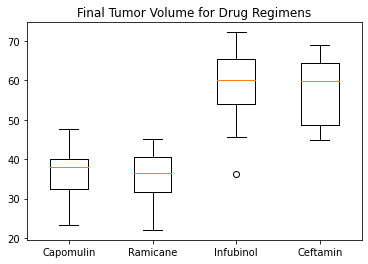

In [71]:
cap_plot = (tumor_vol_df["Capomulin"])
ram_plot = (tumor_vol_df["Ramicane"])
infu_plot = (tumor_vol_df["Infubinol"])
ceft_plot = (tumor_vol_df["Ceftamin"])

plt.boxplot([cap_plot, ram_plot, infu_plot, ceft_plot])

plt.title("Final Tumor Volume for Drug Regimens")
plt.xticks([1,2,3,4], treatments)


plt.show()


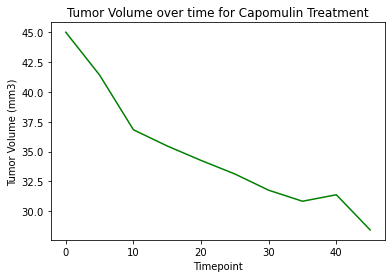

In [69]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


line_df = merged_data[merged_data["Drug Regimen"] == "Capomulin"]
line_df1 = line_df.sort_values("Mouse ID")

mouse_df = line_df.loc[line_df1["Mouse ID"] == "m601"]
mouse_df

x = mouse_df["Timepoint"]
y = mouse_df["Tumor Volume (mm3)"]

plt.plot(x, y, color="green")
plt.title("Tumor Volume over time for Capomulin Treatment")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()



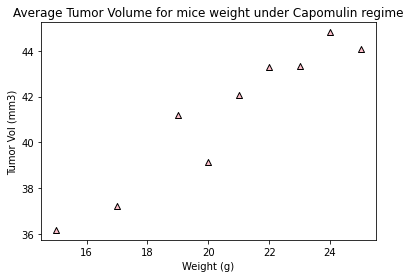

In [134]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

scat_plot = merged_data.loc[merged_data["Drug Regimen"] == "Capomulin"]
scat_plot1 = scat_plot[["Mouse ID","Weight (g)", "Tumor Volume (mm3)"]]
scat_plot2 = scat_plot1.sort_values(["Weight (g)"], ascending=True)
scat_plot3 = scat_plot2.reset_index()
scat_plot4 = scat_plot3.groupby("Weight (g)")["Tumor Volume (mm3)"].mean()

scatter_plot = pd.DataFrame(scat_plot4).reset_index()

plt.scatter(scatter_plot["Weight (g)"], scatter_plot["Tumor Volume (mm3)"], marker="^", facecolors="pink", edgecolors="black")
plt.title("Average Tumor Volume for mice weight under Capomulin regime")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Vol (mm3)")
plt.show()



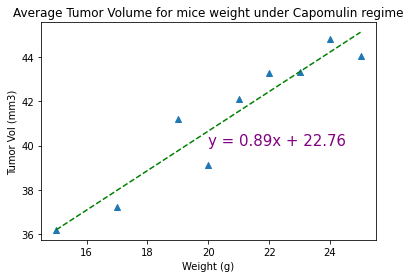

In [152]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

x_cor = scatter_plot["Weight (g)"]
y_cor = scatter_plot["Tumor Volume (mm3)"]

(tu_slope, tu_int, tu_r, tu_p, tu_stderr) = st.linregress(x_cor, y_cor)

tu_fit = tu_slope * x_cor + tu_int

line_eq = "y = " + str(round(tu_slope,2)) + "x + " + str(round(tu_int,2))

regression = x_cor * tu_slope + tu_int

plt.scatter(x_cor, y_cor, marker="^")
plt.plot(x_cor, regression, "--", color="green")
plt.title("Average Tumor Volume for mice weight under Capomulin regime")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Vol (mm3)")

plt.annotate(line_eq,(20,40),fontsize=15,color="purple")
plt.show()